# Week 1: Using CNN's with the Cats vs Dogs Dataset

Welcome to the 1st assignment of the course! This week, you will be using the famous `Cats vs Dogs` dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities.

You will also create some helper functions to move the images around the filesystem so if you are not familiar with the `os` module be sure to take a look a the [docs](https://docs.python.org/3/library/os.html).

Let's get started!

In [11]:
# # installl libraries
# from platform import python_version
# print(python_version())

# !pip install tensorflow  --user
# import tensorflow as tf
# print('tensorflow version: ', tf.__version__)

3.7.11
tensorflow version:  2.8.0


In [12]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [15]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-02-25 09:45:57--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
æ­£åœ¨è§£æž�ä¸»æœº download.microsoft.com... 23.202.172.235
Connecting to download.microsoft.com|23.202.172.235|:443... å·²è¿žæŽ¥ã€‚
  Unable to locally verify the issuer's authority.
å·²å�‘å‡º HTTP è¯·æ±‚ï¼Œæ­£åœ¨ç­‰å¾…å›žåº”... 200 OK
é•¿åº¦ï¼š824894548 (787M) [application/octet-stream]
Saving to: `/tmp/cats-and-dogs.zip'

     0K .......... .......... .......... .......... ..........  0%  137K 98m0s
    50K .......... .......... .......... .......... ..........  0%  208K 81m13s
   100K .......... .......... .......... .......... ..........  0%  319K 68m11s
   150K .......... .......... .......... .......... ..........  0% 1009K 54m27s
   200K .......... .......... .......... .......... ..........  0%  782K 47m0s
   250K .......... .......... ..........

126500K .......... .......... .......... .......... .......... 15% 5.40M 4m23s
126550K .......... .......... .......... .......... .......... 15% 6.72M 4m23s
126600K .......... .......... .......... .......... .......... 15% 6.04M 4m23s
126650K .......... .......... .......... .......... .......... 15% 8.36M 4m23s
126700K .......... .......... .......... .......... .......... 15% 5.00M 4m23s
126750K .......... .......... .......... .......... .......... 15% 8.49M 4m22s
126800K .......... .......... .......... .......... .......... 15% 7.91M 4m22s
126850K .......... .......... .......... .......... .......... 15% 5.33M 4m22s
126900K .......... .......... .......... .......... .......... 15% 3.98M 4m22s
126950K .......... .......... .......... .......... .......... 15%  306K 4m23s
127000K .......... .......... .......... .......... .......... 15% 6.17M 4m23s
127050K .......... .......... .......... .......... .......... 15% 7.76M 4m23s
127100K .......... .......... .......... .......... 

262100K .......... .......... .......... .......... .......... 32%  277K 3m23s
262150K .......... .......... .......... .......... .......... 32% 6.70M 3m23s
262200K .......... .......... .......... .......... .......... 32% 6.00M 3m23s
262250K .......... .......... .......... .......... .......... 32% 7.64M 3m23s
262300K .......... .......... .......... .......... .......... 32% 7.63M 3m23s
262350K .......... .......... .......... .......... .......... 32% 5.67M 3m23s
262400K .......... .......... .......... .......... .......... 32% 7.42M 3m23s
262450K .......... .......... .......... .......... .......... 32% 7.74M 3m23s
262500K .......... .......... .......... .......... .......... 32% 5.59M 3m23s
262550K .......... .......... .......... .......... .......... 32%  356K 3m23s
262600K .......... .......... .......... .......... .......... 32% 7.26M 3m23s
262650K .......... .......... .......... .......... .......... 32% 6.11M 3m23s
262700K .......... .......... .......... .......... 

399150K .......... .......... .......... .......... .......... 49% 7.36M 2m27s
399200K .......... .......... .......... .......... .......... 49%  699K 2m28s
399250K .......... .......... .......... .......... .......... 49% 5.65M 2m27s
399300K .......... .......... .......... .......... .......... 49% 8.01M 2m27s
399350K .......... .......... .......... .......... .......... 49%  239K 2m28s
399400K .......... .......... .......... .......... .......... 49% 7.63M 2m28s
399450K .......... .......... .......... .......... .......... 49% 6.46M 2m28s
399500K .......... .......... .......... .......... .......... 49% 7.65M 2m28s
399550K .......... .......... .......... .......... .......... 49% 5.76M 2m28s
399600K .......... .......... .......... .......... .......... 49% 6.20M 2m27s
399650K .......... .......... .......... .......... .......... 49% 6.34M 2m27s
399700K .......... .......... .......... .......... .......... 49% 7.09M 2m27s
399750K .......... .......... .......... .......... 

530750K .......... .......... .......... .......... .......... 65% 2.54M 1m40s
530800K .......... .......... .......... .......... .......... 65% 2.57M 1m40s
530850K .......... .......... .......... .......... .......... 65%  991K 1m40s
530900K .......... .......... .......... .......... .......... 65% 2.29M 1m40s
530950K .......... .......... .......... .......... .......... 65% 2.82M 1m40s
531000K .......... .......... .......... .......... .......... 65% 1.66M 1m40s
531050K .......... .......... .......... .......... .......... 65% 2.80M 1m40s
531100K .......... .......... .......... .......... .......... 65% 1.90M 1m40s
531150K .......... .......... .......... .......... .......... 65% 2.58M 1m40s
531200K .......... .......... .......... .......... .......... 65% 2.54M 1m40s
531250K .......... .......... .......... .......... .......... 65% 2.15M 1m40s
531300K .......... .......... .......... .......... .......... 65% 1.82M 1m40s
531350K .......... .......... .......... .......... 

673100K .......... .......... .......... .......... .......... 83% 1.68M 58s
673150K .......... .......... .......... .......... .......... 83% 1.63M 58s
673200K .......... .......... .......... .......... .......... 83% 1.84M 58s
673250K .......... .......... .......... .......... .......... 83% 1.62M 58s
673300K .......... .......... .......... .......... .......... 83% 1.77M 58s
673350K .......... .......... .......... .......... .......... 83% 1.82M 58s
673400K .......... .......... .......... .......... .......... 83% 1.83M 58s
673450K .......... .......... .......... .......... .......... 83% 1.58M 58s
673500K .......... .......... .......... .......... .......... 83% 1.73M 58s
673550K .......... .......... .......... .......... .......... 83% 1.83M 58s
673600K .......... .......... .......... .......... .......... 83% 1.78M 58s
673650K .......... .......... .......... .......... .......... 83% 1.45M 58s
673700K .......... .......... .......... .......... .......... 83% 1.53M 58s

795650K .......... .......... .......... .......... .......... 98% 1.59M 5s
795700K .......... .......... .......... .......... .......... 98% 1.48M 5s
795750K .......... .......... .......... .......... .......... 98% 1.69M 5s
795800K .......... .......... .......... .......... .......... 98% 1.71M 5s
795850K .......... .......... .......... .......... .......... 98% 1.56M 5s
795900K .......... .......... .......... .......... .......... 98% 1.81M 5s
795950K .......... .......... .......... .......... .......... 98% 1.62M 5s
796000K .......... .......... .......... .......... .......... 98% 1.77M 5s
796050K .......... .......... .......... .......... .......... 98% 1.33M 5s
796100K .......... .......... .......... .......... .......... 98% 1.75M 5s
796150K .......... .......... .......... .......... .......... 98% 1.77M 5s
796200K .......... .......... .......... .......... .......... 98% 1.70M 4s
796250K .......... .......... .......... .......... .......... 98% 1.56M 4s
796300K ....

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-02-25 09:49:26--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
æ­£åœ¨è§£æž�ä¸»æœº download.microsoft.com... 23.202.172.235
Connecting to download.microsoft.com|23.202.172.235|:443... å·²è¿žæŽ¥ã€‚
  Unable to locally verify the issuer's authority.
å·²å�‘å‡º HTTP è¯·æ±‚ï¼Œæ­£åœ¨ç­‰å¾…å›žåº”... 200 OK
é•¿åº¦ï¼š824894548 (787M) [application/octet-stream]
Saving to: `/tmp/cats-and-dogs.zip'

     0K .......... .......... .......... .......... ..........  0%  682K 19m40s
    50K .......... .......... .......... .......... ..........  0% 14.9M 10m16s
   100K .......... .......... .......... .......... ..........  0% 2.24M 8m48s
   150K .......... .......... .......... .......... ..........  0% 2.36M 7m59s
   200K .......... .......... .......... .......... ..........  0% 4.86M 6m56s
   250K .......... .......... .......... 

124600K .......... .......... .......... .......... .......... 15% 8.44M 4m59s
124650K .......... .......... .......... .......... .......... 15% 5.42M 4m59s
124700K .......... .......... .......... .......... .......... 15% 4.73M 4m59s
124750K .......... .......... .......... .......... .......... 15% 5.87M 4m59s
124800K .......... .......... .......... .......... .......... 15% 5.89M 4m59s
124850K .......... .......... .......... .......... .......... 15% 5.23M 4m59s
124900K .......... .......... .......... .......... .......... 15% 5.39M 4m59s
124950K .......... .......... .......... .......... .......... 15% 6.75M 4m58s
125000K .......... .......... .......... .......... .......... 15% 5.70M 4m58s
125050K .......... .......... .......... .......... .......... 15% 5.32M 4m58s
125100K .......... .......... .......... .......... .......... 15% 6.43M 4m58s
125150K .......... .......... .......... .......... .......... 15% 4.51M 4m58s
125200K .......... .......... .......... .......... 

248850K .......... .......... .......... .......... .......... 30% 1.75M 4m36s
248900K .......... .......... .......... .......... .......... 30% 1.75M 4m36s
248950K .......... .......... .......... .......... .......... 30% 1.49M 4m36s
249000K .......... .......... .......... .......... .......... 30% 1.82M 4m36s
249050K .......... .......... .......... .......... .......... 30% 1.56M 4m36s
249100K .......... .......... .......... .......... .......... 30% 1.72M 4m36s
249150K .......... .......... .......... .......... .......... 30% 1.77M 4m36s
249200K .......... .......... .......... .......... .......... 30% 1.60M 4m36s
249250K .......... .......... .......... .......... .......... 30% 1.37M 4m36s
249300K .......... .......... .......... .......... .......... 30% 1.92M 4m36s
249350K .......... .......... .......... .......... .......... 30% 1.62M 4m36s
249400K .......... .......... .......... .......... .......... 30% 2.18M 4m36s
249450K .......... .......... .......... .......... 

388100K .......... .......... .......... .......... .......... 48% 3.59M 3m22s
388150K .......... .......... .......... .......... .......... 48% 3.67M 3m22s
388200K .......... .......... .......... .......... .......... 48% 4.33M 3m22s
388250K .......... .......... .......... .......... .......... 48% 3.06M 3m22s
388300K .......... .......... .......... .......... .......... 48% 3.88M 3m22s
388350K .......... .......... .......... .......... .......... 48% 3.80M 3m22s
388400K .......... .......... .......... .......... .......... 48% 4.08M 3m22s
388450K .......... .......... .......... .......... .......... 48% 4.60M 3m22s
388500K .......... .......... .......... .......... .......... 48% 3.98M 3m22s
388550K .......... .......... .......... .......... .......... 48% 3.11M 3m22s
388600K .......... .......... .......... .......... .......... 48% 4.60M 3m22s
388650K .......... .......... .......... .......... .......... 48% 4.08M 3m22s
388700K .......... .......... .......... .......... 

518800K .......... .......... .......... .......... .......... 64% 2.15M 2m17s
518850K .......... .......... .......... .......... .......... 64% 2.35M 2m17s
518900K .......... .......... .......... .......... .......... 64% 1.78M 2m17s
518950K .......... .......... .......... .......... .......... 64% 2.93M 2m17s
519000K .......... .......... .......... .......... .......... 64% 1.64M 2m17s
519050K .......... .......... .......... .......... .......... 64% 2.18M 2m17s
519100K .......... .......... .......... .......... .......... 64% 2.82M 2m17s
519150K .......... .......... .......... .......... .......... 64% 2.41M 2m17s
519200K .......... .......... .......... .......... .......... 64% 1.98M 2m17s
519250K .......... .......... .......... .......... .......... 64% 2.10M 2m17s
519300K .......... .......... .......... .......... .......... 64% 2.33M 2m17s
519350K .......... .......... .......... .......... .......... 64% 1.92M 2m17s
519400K .......... .......... .......... .......... 

653700K .......... .......... .......... .......... .......... 81% 1.97M 76s
653750K .......... .......... .......... .......... .......... 81% 1.85M 76s
653800K .......... .......... .......... .......... .......... 81% 2.52M 76s
653850K .......... .......... .......... .......... .......... 81% 1.47M 76s
653900K .......... .......... .......... .......... .......... 81% 2.25M 76s
653950K .......... .......... .......... .......... .......... 81% 2.43M 76s
654000K .......... .......... .......... .......... .......... 81% 2.12M 76s
654050K .......... .......... .......... .......... .......... 81% 1.74M 76s
654100K .......... .......... .......... .......... .......... 81% 2.02M 76s
654150K .......... .......... .......... .......... .......... 81% 2.06M 76s
654200K .......... .......... .......... .......... .......... 81% 1.82M 76s
654250K .......... .......... .......... .......... .......... 81% 2.12M 76s
654300K .......... .......... .......... .......... .......... 81% 1.88M 76s

769950K .......... .......... .......... .......... .......... 95% 3.86M 17s
770000K .......... .......... .......... .......... .......... 95% 2.54M 17s
770050K .......... .......... .......... .......... .......... 95% 4.72M 17s
770100K .......... .......... .......... .......... .......... 95% 3.03M 17s
770150K .......... .......... .......... .......... .......... 95% 3.19M 17s
770200K .......... .......... .......... .......... .......... 95% 3.43M 17s
770250K .......... .......... .......... .......... .......... 95% 3.31M 17s
770300K .......... .......... .......... .......... .......... 95% 3.29M 17s
770350K .......... .......... .......... .......... .......... 95% 3.21M 17s
770400K .......... .......... .......... .......... .......... 95% 3.18M 17s
770450K .......... .......... .......... .......... .......... 95% 2.84M 17s
770500K .......... .......... .......... .......... .......... 95% 3.08M 17s
770550K .......... .......... .......... .......... .......... 95% 4.11M 17s

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2022-02-25 09:50:10--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
æ­£åœ¨è§£æž�ä¸»æœº download.microsoft.com... 23.202.172.235
Connecting to download.microsoft.com|23.202.172.235|:443... å·²è¿žæŽ¥ã€‚
  Unable to locally verify the issuer's authority.
å·²å�‘å‡º HTTP è¯·æ±‚ï¼Œæ­£åœ¨ç­‰å¾…å›žåº”... 200 OK
é•¿åº¦ï¼š824894548 (787M) [application/octet-stream]
Saving to: `/tmp/cats-and-dogs.zip'

     0K .......... .......... .......... .......... ..........  0% 1.09M 12m4s
    50K .......... .......... .......... .......... ..........  0% 3.08M 8m10s
   100K .......... .......... .......... .......... ..........  0% 1.71M 7m59s
   150K .......... .......... .......... .......... ..........  0% 2.42M 7m21s
   200K .......... .......... .......... .......... ..........  0% 2.76M 6m50s
   250K .......... .......... .......... ..

 24050K .......... .......... .......... .......... ..........  2% 1.15M 7m14s
 24100K .......... .......... .......... .......... ..........  2% 1.55M 7m14s
 24150K .......... .......... .......... .......... ..........  3% 1.23M 7m14s
 24200K .......... .......... .......... .......... ..........  3% 1.46M 7m15s
 24250K .......... .......... .......... .......... ..........  3% 1.52M 7m15s
 24300K .......... .......... .......... .......... ..........  3% 1.01M 7m15s
 24350K .......... .......... .......... .......... ..........  3% 1.48M 7m16s
 24400K .......... .......... .......... .......... ..........  3% 1.35M 7m16s
 24450K .......... .......... .......... .......... ..........  3% 1010K 7m16s
 24500K .......... .......... .......... .......... ..........  3% 1.49M 7m17s
 24550K .......... .......... .......... .......... ..........  3% 1.55M 7m17s
 24600K .......... .......... .......... .......... ..........  3% 1.29M 7m17s
 24650K .......... .......... .......... .......... 

142150K .......... .......... .......... .......... .......... 17% 1.64M 5m32s
142200K .......... .......... .......... .......... .......... 17% 1.38M 5m32s
142250K .......... .......... .......... .......... .......... 17% 1.31M 5m32s
142300K .......... .......... .......... .......... .......... 17% 1.81M 5m32s
142350K .......... .......... .......... .......... .......... 17% 2.29M 5m32s
142400K .......... .......... .......... .......... .......... 17% 2.39M 5m32s
142450K .......... .......... .......... .......... .......... 17% 1.72M 5m32s
142500K .......... .......... .......... .......... .......... 17% 1.84M 5m32s
142550K .......... .......... .......... .......... .......... 17% 1.24M 5m32s
142600K .......... .......... .......... .......... .......... 17% 1.74M 5m32s
142650K .......... .......... .......... .......... .......... 17% 1.86M 5m32s
142700K .......... .......... .......... .......... .......... 17% 1.97M 5m32s
142750K .......... .......... .......... .......... 

264300K .......... .......... .......... .......... .......... 32% 1.62M 5m1s
264350K .......... .......... .......... .......... .......... 32% 1.08M 5m1s
264400K .......... .......... .......... .......... .......... 32% 1.42M 5m1s
264450K .......... .......... .......... .......... .......... 32% 1.74M 5m1s
264500K .......... .......... .......... .......... .......... 32% 1.00M 5m1s
264550K .......... .......... .......... .......... .......... 32% 1.87M 5m1s
264600K .......... .......... .......... .......... .......... 32% 1.49M 5m1s
264650K .......... .......... .......... .......... .......... 32% 1.43M 5m1s
264700K .......... .......... .......... .......... .......... 32% 1.73M 5m0s
264750K .......... .......... .......... .......... .......... 32% 1.92M 5m0s
264800K .......... .......... .......... .......... .......... 32% 1.36M 5m0s
264850K .......... .......... .......... .......... .......... 32% 1.31M 5m0s
264900K .......... .......... .......... .......... .......... 3

387200K .......... .......... .......... .......... .......... 48% 1.76M 3m29s
387250K .......... .......... .......... .......... .......... 48% 1.51M 3m29s
387300K .......... .......... .......... .......... .......... 48% 1.34M 3m29s
387350K .......... .......... .......... .......... .......... 48% 1.66M 3m29s
387400K .......... .......... .......... .......... .......... 48% 1.58M 3m29s
387450K .......... .......... .......... .......... .......... 48% 1.41M 3m29s
387500K .......... .......... .......... .......... .......... 48% 1.48M 3m29s
387550K .......... .......... .......... .......... .......... 48% 1.37M 3m29s
387600K .......... .......... .......... .......... .......... 48% 1.83M 3m29s
387650K .......... .......... .......... .......... .......... 48% 1.48M 3m29s
387700K .......... .......... .......... .......... .......... 48% 1.36M 3m29s
387750K .......... .......... .......... .......... .......... 48% 1.89M 3m29s
387800K .......... .......... .......... .......... 

504950K .......... .......... .......... .......... .......... 62% 3.20M 2m28s
505000K .......... .......... .......... .......... .......... 62% 4.00M 2m28s
505050K .......... .......... .......... .......... .......... 62% 3.04M 2m28s
505100K .......... .......... .......... .......... .......... 62% 4.03M 2m28s
505150K .......... .......... .......... .......... .......... 62% 3.89M 2m28s
505200K .......... .......... .......... .......... .......... 62% 3.64M 2m28s
505250K .......... .......... .......... .......... .......... 62% 5.11M 2m28s
505300K .......... .......... .......... .......... .......... 62% 3.04M 2m28s
505350K .......... .......... .......... .......... .......... 62% 3.09M 2m28s
505400K .......... .......... .......... .......... .......... 62% 4.45M 2m28s
505450K .......... .......... .......... .......... .......... 62% 4.33M 2m28s
505500K .......... .......... .......... .......... .......... 62% 3.39M 2m28s
505550K .......... .......... .......... .......... 

621500K .......... .......... .......... .......... .......... 77% 3.42M 87s
621550K .......... .......... .......... .......... .......... 77% 2.72M 86s
621600K .......... .......... .......... .......... .......... 77% 2.44M 86s
621650K .......... .......... .......... .......... .......... 77% 2.58M 86s
621700K .......... .......... .......... .......... .......... 77% 2.58M 86s
621750K .......... .......... .......... .......... .......... 77% 2.29M 86s
621800K .......... .......... .......... .......... .......... 77% 3.08M 86s
621850K .......... .......... .......... .......... .......... 77% 2.47M 86s
621900K .......... .......... .......... .......... .......... 77% 2.94M 86s
621950K .......... .......... .......... .......... .......... 77% 2.83M 86s
622000K .......... .......... .......... .......... .......... 77% 2.33M 86s
622050K .......... .......... .......... .......... .......... 77% 3.71M 86s
622100K .......... .......... .......... .......... .......... 77% 2.04M 86s

750450K .......... .......... .......... .......... .......... 93% 2.72M 25s
750500K .......... .......... .......... .......... .......... 93% 4.67M 25s
750550K .......... .......... .......... .......... .......... 93% 3.85M 25s
750600K .......... .......... .......... .......... .......... 93% 2.59M 25s
750650K .......... .......... .......... .......... .......... 93% 5.16M 25s
750700K .......... .......... .......... .......... .......... 93% 3.67M 25s
750750K .......... .......... .......... .......... .......... 93% 3.08M 25s
750800K .......... .......... .......... .......... .......... 93% 4.46M 25s
750850K .......... .......... .......... .......... .......... 93% 3.24M 25s
750900K .......... .......... .......... .......... .......... 93% 3.02M 25s
750950K .......... .......... .......... .......... .......... 93% 4.06M 25s
751000K .......... .......... .......... .......... .......... 93% 2.97M 25s
751050K .......... .......... .......... .......... .......... 93% 4.18M 25s

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [16]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


**Expected Output:**

```
There are 12501 images of dogs.
There are 12501 images of cats.
```

You will need a directory for cats-v-dogs, and subdirectories for training
and testing. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, complete the `create_train_test_dirs` below:

In [17]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  
  dirs = ['training', 'testing']
  files = ['cats','dogs']

  for train_test_dirs in dirs:   
    print(os.path.join(root_path, train_test_dirs))
    for cats_and_dogs in files:
      path = os.path.join(root_path, train_test_dirs, cats_and_dogs)
      os.makedirs(path, exist_ok = True)  
      print(os.path.join(root_path, train_test_dirs, cats_and_dogs))


  pass

  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

/tmp/cats-v-dogs\training
/tmp/cats-v-dogs\training\cats
/tmp/cats-v-dogs\training\dogs
/tmp/cats-v-dogs\testing
/tmp/cats-v-dogs\testing\cats
/tmp/cats-v-dogs\testing\dogs


In [18]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs\testing
/tmp/cats-v-dogs\training
/tmp/cats-v-dogs\testing\cats
/tmp/cats-v-dogs\testing\dogs
/tmp/cats-v-dogs\training\cats
/tmp/cats-v-dogs\training\dogs


**Expected Output (directory order might vary):**

``` txt
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/testing/dogs

```

Code the `split_data` function which takes in the following arguments:
- SOURCE: directory containing the files

- TRAINING: directory that a portion of the files will be copied to (will be used for training)
- TESTING: directory that a portion of the files will be copied to (will be used for testing)
- SPLIT SIZE: to determine the portion

The files should be randomized, so that the training set is a random sample of the files, and the test set is made up of the remaining files.

For example, if `SOURCE` is `PetImages/Cat`, and `SPLIT` SIZE is .9 then 90% of the images in `PetImages/Cat` will be copied to the `TRAINING` dir
and 10% of the images will be copied to the `TESTING` dir.

All images should be checked before the copy, so if they have a zero file length, they will be omitted from the copying process. If this is the case then your function should print out a message such as `"filename is zero length, so ignoring."`. **You should perform this check before the split so that only non-zero images are considered when doing the actual split.**


Hints:

- `os.listdir(DIRECTORY)` returns a list with the contents of that directory.

- `os.path.getsize(PATH)` returns the size of the file

- `copyfile(source, destination)` copies a file from source to destination

- `random.sample(list, len(list))` shuffles a list

In [19]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  source = os.listdir(SOURCE)
  #print('SOURCE: ', SOURCE)
  #print('source: ' , source)
  all_files = []
  for file_name in source:
    file_path = SOURCE + file_name
    #print('file_path: ', file_path)
    
    if os.path.getsize(file_path):
      all_files.append(file_name)
      #print('file_name: ', file_name)
    else:
      print('{}.jpg is zero length, so ignoring.'.format(file_name))

  shuffle = random.sample(all_files, len(all_files))
  train = shuffle[:int(SPLIT_SIZE * len(all_files))]
  test = shuffle[int(SPLIT_SIZE * len(all_files)):]


  for train_sample in train:
    copyfile(SOURCE + train_sample, TRAINING + train_sample)
  for test_sample in test: 
    copyfile(SOURCE + test_sample, TESTING + test_sample)

  pass

  ### END CODE HERE


In [20]:
# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")


666.jpg.jpg is zero length, so ignoring.
11702.jpg.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


Now that you have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the `train_val_generators` function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows you to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. **For this exercise, use a `target_size` of (150, 150)**.

**Note:** So far, you have seen the term `testing` being used a lot for referring to a subset of images within the dataset. In this exercise, all of the `testing` data is actually being used as `validation` data. This is not very important within the context of the task at hand but it is worth mentioning to avoid confusion.

**Expected Output:**

```
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
```

```
There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing
```

In [21]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory="/tmp/cats-v-dogs/training",
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory="/tmp/cats-v-dogs/testing",
                                                                batch_size=20,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [22]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
from tensorflow.keras.optimizers import RMSprop

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
            tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


Now it is time to train your model!

**Note:** You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [ ]:
# #check out if the notebook is using GPU on local machine
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [26]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)



Epoch 1/20
 393/1125 [=========>....................] - ETA: 3:41 - loss: 0.7577 - accuracy: 0.6079

C:\Users\jingc\anaconda3\envs\python37\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1125/1125 [==============================] - 346s 307ms/step - loss: 0.6281 - accuracy: 0.6792 - val_loss: 0.4819 - val_accuracy: 0.7664
Epoch 2/20
1125/1125 [==============================] - 336s 299ms/step - loss: 0.4705 - accuracy: 0.7818 - val_loss: 0.4674 - val_accuracy: 0.7696
Epoch 3/20
1125/1125 [==============================] - 343s 305ms/step - loss: 0.4091 - accuracy: 0.8190 - val_loss: 0.3709 - val_accuracy: 0.8312
Epoch 4/20
1125/1125 [==============================] - 338s 300ms/step - loss: 0.3758 - accuracy: 0.8389 - val_loss: 0.4301 - val_accuracy: 0.8128
Epoch 5/20
1125/1125 [==============================] - 342s 304ms/step - loss: 0.3459 - accuracy: 0.8566 - val_loss: 0.3636 - val_accuracy: 0.8444
Epoch 6/20
1125/1125 [==============================] - 335s 298ms/step - loss: 0.3343 - accuracy: 0.8653 - val_loss: 0.3969 - val_accuracy: 0.8312
Epoch 7/20
1125/1125 [==============================] - 336s 299ms/step - loss: 0.3212 - accuracy: 0.8731 - val_loss: 0.508

KeyboardInterrupt: 

Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

**To pass this assignment, your model should achieve a training accuracy of at least 95% and a validation accuracy of at least 80%**. If your model didn't achieve these thresholds, try training again with a different model architecture and remember to use at least 3 convolutional layers.

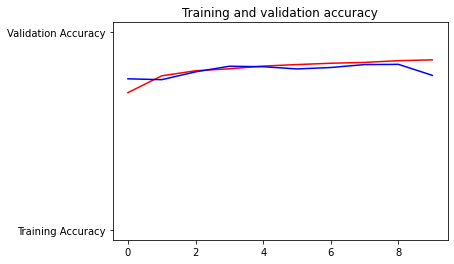

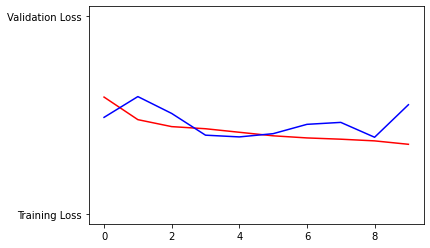

In [145]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

You will probably encounter that the model is overfitting, which means that it is doing a great job at classifying the images in the training set but struggles with new data. This is perfectly fine and you will learn how to mitigate this issue in the upcoming week.

Before downloading this notebook and closing the assignment, be sure to also download the `history.pkl` file which contains the information of the training history of your model. You can download this file by running the cell below:

In [146]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You will also need to submit this notebook for grading. To download it, click on the `File` tab in the upper left corner of the screen then click on `Download` -> `Download .ipynb`. You can name it anything you want as long as it is a valid `.ipynb` (jupyter notebook) file.

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs, along with the helper functions needed to pre-process the images!

**Keep it up!**